# Machine learning - jour 1

- Gauthier CADET
- Sophie HERB
- Tristan SCHWARTZ

## Imports

In [26]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier


## Lecture du tableau de données

In [27]:

df = pd.read_csv("./csv/bodyPerformance.csv", header=0, delimiter=",")
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


## Mise en corrélation
Mise en corrélation de la données pour en faire ressortir les éléments marquants (source : cours)

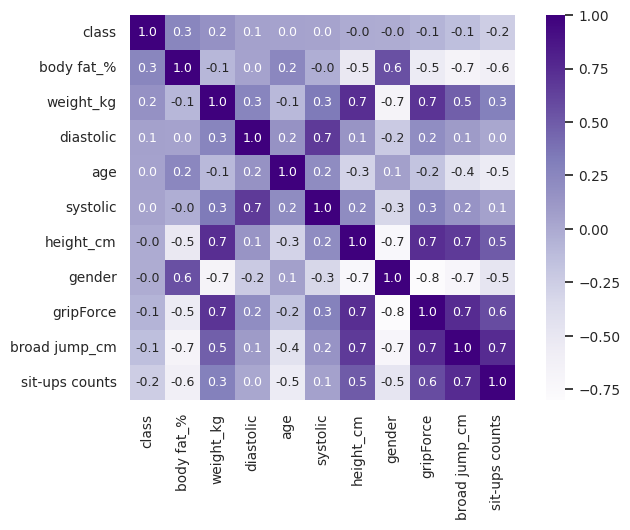

In [28]:
df.dropna(axis=0, inplace=True)
df['gender'] = pd.factorize(df['gender'])[0]
df.head()
# Ou X sont les données d'entrées
X = df[['age', 'gender', 'height_cm', 'diastolic', 'gripForce', 'broad jump_cm']]
X

,age,gender,height_cm,diastolic,gripForce,broad jump_cm
0,27.0,0,172.3,80.0,54.9,217.0
1,25.0,0,165.0,77.0,36.4,229.0
2,31.0,0,179.6,92.0,44.8,181.0
3,32.0,0,174.5,76.0,41.4,219.0
4,28.0,0,173.8,70.0,43.5,217.0
...,...,...,...,...,...,...
13388,25.0,0,172.1,74.0,35.8,198.0
13389,21.0,0,179.7,74.0,33.0,167.0
13390,39.0,0,177.2,78.0,63.5,229.0
13391,64.0,1,146.1,68.0,19.3,75.0


In [29]:
# Ou y sont la liste des résultats attendus
y = df[['class']]
y

,class
0,C
1,A
2,C
3,B
4,B
...,...
13388,C
13389,D
13390,A
13391,D


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=0)

In [31]:
# modèle arbre de décision

model = DecisionTreeClassifier(max_depth=15, random_state=42)
model.fit(X_train, y_train) # permet de s'entrainer sur les données fournies
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           A       0.45      0.47      0.46       670
           B       0.29      0.29      0.29       669
           C       0.27      0.27      0.27       670
           D       0.45      0.42      0.44       670

    accuracy                           0.36      2679
   macro avg       0.37      0.36      0.36      2679
weighted avg       0.37      0.36      0.36      2679



In [32]:
# modèle neuronnale knn
model = KNeighborsClassifier(10)
model.fit(X_train, y_train) # permet de s'entrainer sur les données fournies

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

d:\pyhtonInstall\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           A       0.44      0.61      0.51       670
           B       0.28      0.27      0.28       669
           C       0.29      0.23      0.26       670
           D       0.50      0.43      0.46       670

    accuracy                           0.38      2679
   macro avg       0.38      0.38      0.38      2679
weighted avg       0.38      0.38      0.38      2679



In [33]:
# modèle QuadraticDiscriminantAnalysis

# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(
#         max_depth=5, n_estimators=10, max_features=1, random_state=42
#     ),
# model.fit(X_train, y_train) # permet de s'entrainer sur les données fournies

# y_predict = model.predict(X_test)
# print(classification_report(y_test, y_predict))

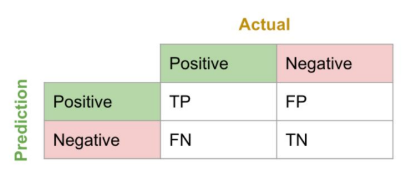

Où TP est la précision

```python

In [34]:
# Construction du réseau de neurones (requiert Tensorflow)

model_neurones = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

# Compilation du modèle
model_neurones.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model_neurones.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Évaluation du modèle
test_loss, test_acc = model_neurones.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Visualisation de l'entraînement
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

NameError: name 'keras' is not defined